In [1]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置默认字体为黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号'-'显示为方块的问题
import pandas as pd
import numpy as np
import scipy
import os 
import matplotlib.pyplot as plt


from sklearn.naive_bayes import GaussianNB 
from sklearn.linear_model import LogisticRegression 
from sklearn import ensemble 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import brier_score_loss, precision_score, recall_score,f1_score, roc_auc_score, accuracy_score 
from sklearn.metrics import confusion_matrix, roc_curve

from sklearn.preprocessing import StandardScaler 
from sklearn.feature_extraction import DictVectorizer
from sklearn.cluster import KMeans

import random

from scipy.stats import ttest_ind

In [3]:
medicare_raw_data = pd.read_csv("D:\\AI_Code\\Feature_Engineering\\medicareDataNew.csv")

In [5]:
columns_names = medicare_raw_data.columns.tolist()  #获取列名

In [8]:
medicare_array_data = medicare_raw_data.values  #转成数组

In [9]:
medicare_array_data = medicare_array_data[:,1:]  #去掉编码一列

In [16]:
medicare_array_data

array([[ 0.,  6.,  7., ...,  0.,  1.,  0.],
       [ 0.,  6.,  4., ...,  0.,  1.,  0.],
       [ 8.,  6.,  8., ...,  0.,  0.,  0.],
       ...,
       [ 4.,  6.,  8., ...,  0.,  1.,  0.],
       [ 0.,  6.,  5., ...,  0.,  0.,  0.],
       [ 7.,  6., 13., ...,  0.,  0.,  1.]])

In [17]:
medicare_array_data.shape

(16000, 81)

In [18]:
#得到欺诈和非欺诈的人
medicare_fraud = medicare_array_data[medicare_array_data[:,-1]==1]

medicare_notfraud = medicare_array_data[medicare_array_data[:,-1]==0]

In [19]:
medicare_fraud.shape,medicare_notfraud.shape   #得到诈骗的人数

((793, 81), (15207, 81))

In [20]:
medicare_fraud

array([[ 0.,  6.,  5., ...,  0.,  0.,  1.],
       [ 0.,  5.,  7., ...,  0.,  0.,  1.],
       [ 0.,  2.,  5., ...,  0.,  1.,  1.],
       ...,
       [ 0.,  6., 14., ...,  0.,  0.,  1.],
       [11.,  6., 20., ...,  0.,  0.,  1.],
       [ 7.,  6., 13., ...,  0.,  0.,  1.]])

In [21]:
#得到每列的最大值，最小值，平均值
#欺诈
max_fraud_value = np.max(medicare_fraud,axis=0)
min_fraud_value = np.min(medicare_fraud,axis=0)
mean_fraud_value = np.mean(medicare_fraud,axis=0)
#非欺诈
max_notfraud_value = np.max(medicare_notfraud,axis=0)
min_notfraud_value = np.min(medicare_notfraud,axis=0)
mean_notfraud_value = np.mean(medicare_notfraud,axis=0)

In [22]:
labels_X = np.linspace(0,42,81)

In [23]:
labels_X.shape,max_fraud_value

((81,),
 array([1.08000000e+02, 7.00000000e+00, 3.10000000e+01, 2.88333333e+01,
        8.00000000e+00, 7.00000000e+00, 3.07000000e+02, 7.50000000e+01,
        5.11666667e+01, 3.96304100e+04, 2.09769150e+04, 4.93448900e+04,
        3.86560567e+04, 1.70000000e+02, 1.39000000e+02, 9.90359300e+04,
        8.31454400e+04, 2.03167880e+05, 1.27472760e+05, 9.00000000e+00,
        1.41500000e+03, 1.73000000e+02, 1.00000000e+00, 7.00000000e+00,
        0.00000000e+00, 3.18425800e+04, 1.25861490e+05, 2.40320340e+05,
        3.03730000e+04, 2.31936340e+05, 1.11651300e+04, 2.24594610e+05,
        1.74479310e+05, 1.15738150e+05, 2.92545600e+04, 1.08470000e+04,
        2.88000000e+03, 1.06700000e+04, 3.67200000e+03, 5.20170000e+04,
        5.04000000e+03, 5.10878000e+04, 4.67500000e+03, 3.00000000e+02,
        4.67500000e+03, 4.68000000e+02, 4.68000000e+02, 1.14255500e+04,
        1.13712000e+04, 4.15410000e+03, 6.77600000e+03, 2.22400000e+02,
        1.00000000e+02, 1.03189600e+04, 1.30000000e+03, 

In [24]:
columns_names_categories = np.array(columns_names)
columns_names_categories = columns_names_categories[1:]  #列名

In [25]:
#画图函数，分别画出欺诈非欺诈每个特征相应的最大值，最小值，平均值，进行对比
def plot_max_min_mean(features_num,data_fraud,data_notfraud,features):
    bar_width = 0.4  #柱状图宽度
    x_coordinate = np.linspace(0,16,features_num)  #条起始坐标  
    plt.figure(figsize=(16,8))
    plt.bar(x_coordinate, data_fraud, label = 'fraud', color = 'indianred', alpha = 0.8, width = bar_width)
    plt.bar(x_coordinate+bar_width , data_notfraud, label = 'notfraud', color = 'steelblue', alpha = 0.8, width = bar_width)
    # 添加轴标签
    plt.xlabel('features')
    plt.ylabel('values')
    plt.title('fraud-notfraud')
    plt.xticks(rotation=90)  #横坐标竖直放置
    plt.xticks(x_coordinate+0.3, features)
    
    plt.legend(loc='upper right')
    
    plt.show()

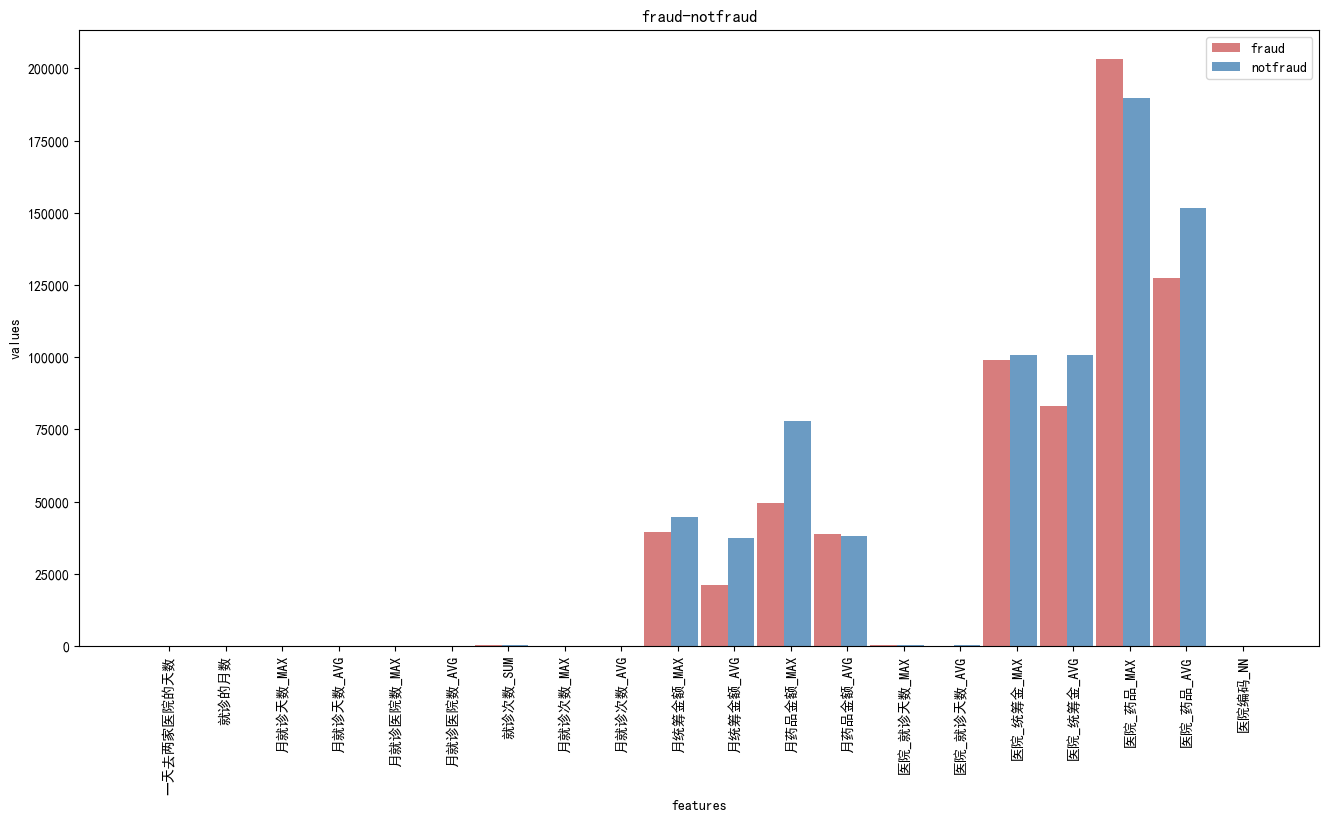

In [26]:
plot_max_min_mean(20,max_fraud_value[0:20],max_notfraud_value[0:20],columns_names_categories[0:20])

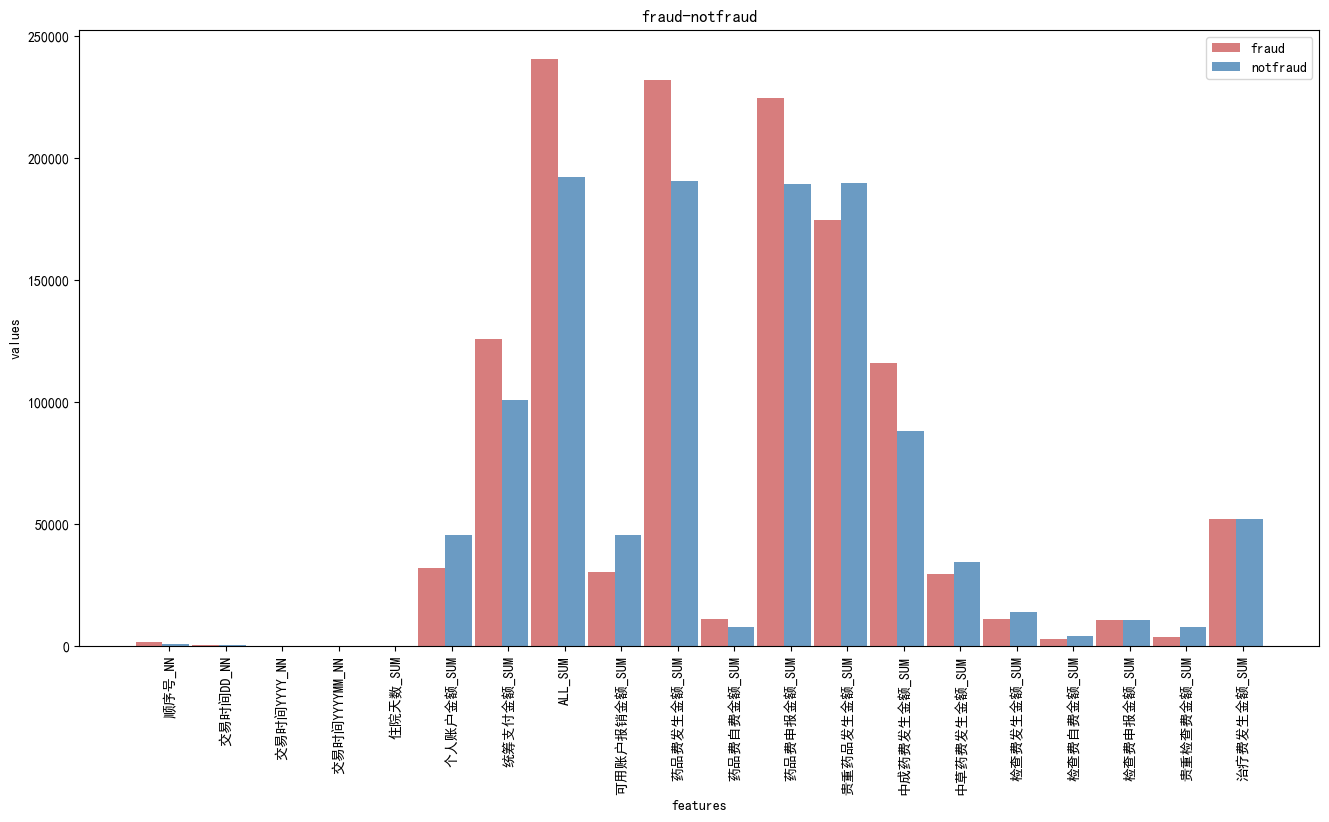

In [27]:
plot_max_min_mean(20,max_fraud_value[20:40],max_notfraud_value[20:40],columns_names_categories[20:40])

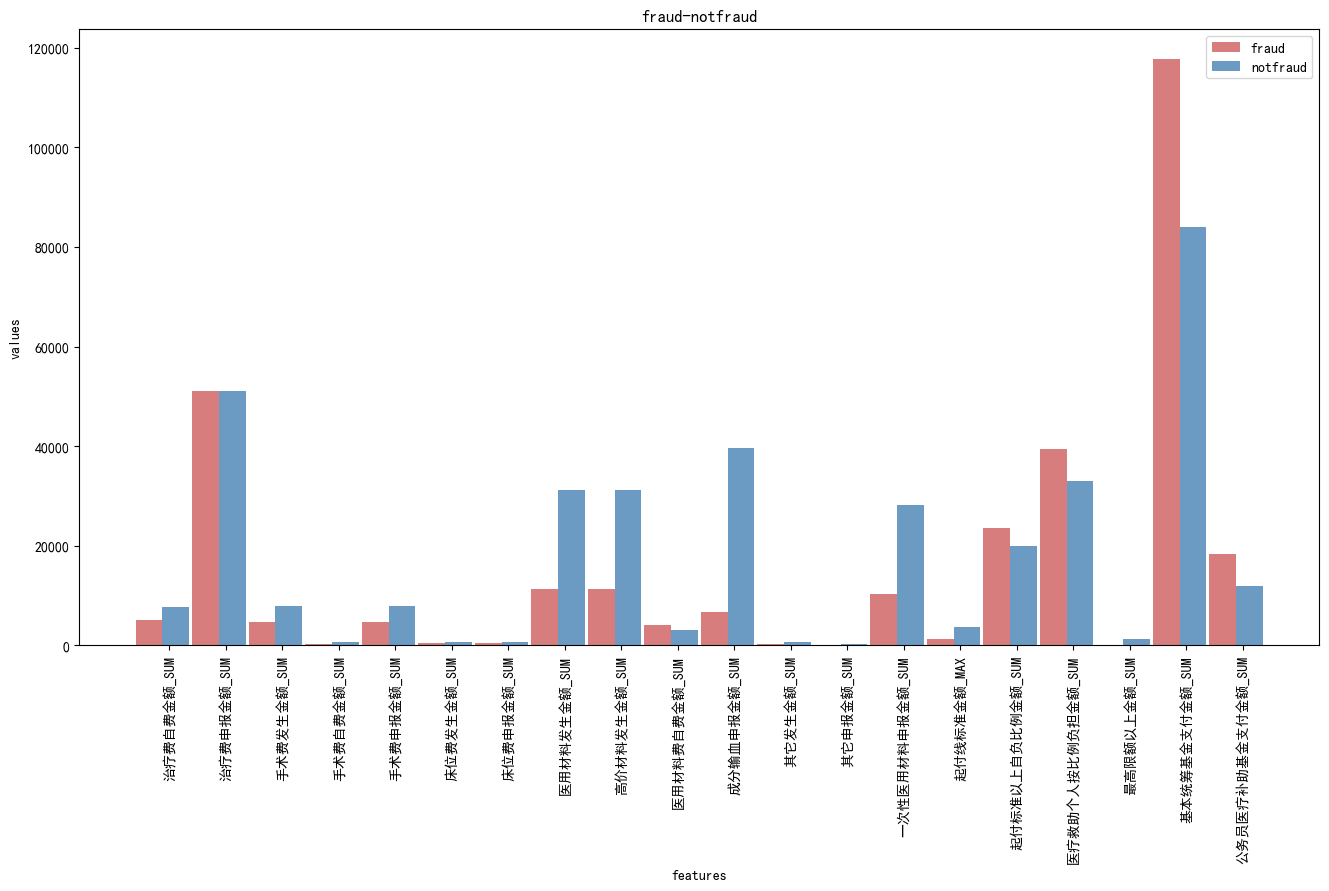

In [28]:
plot_max_min_mean(20,max_fraud_value[40:60],max_notfraud_value[40:60],columns_names_categories[40:60])

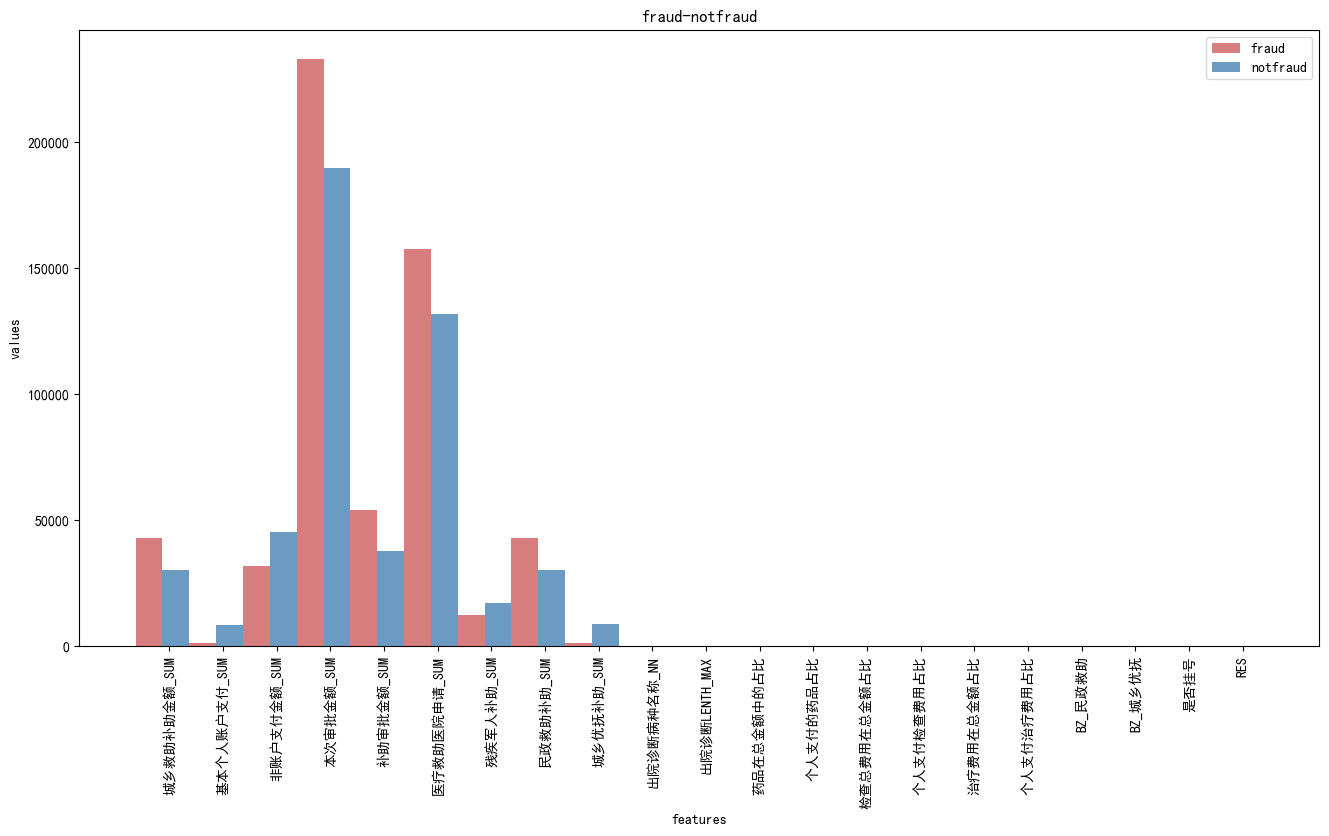

In [29]:
plot_max_min_mean(21,max_fraud_value[60:],max_notfraud_value[60:],columns_names_categories[60:])

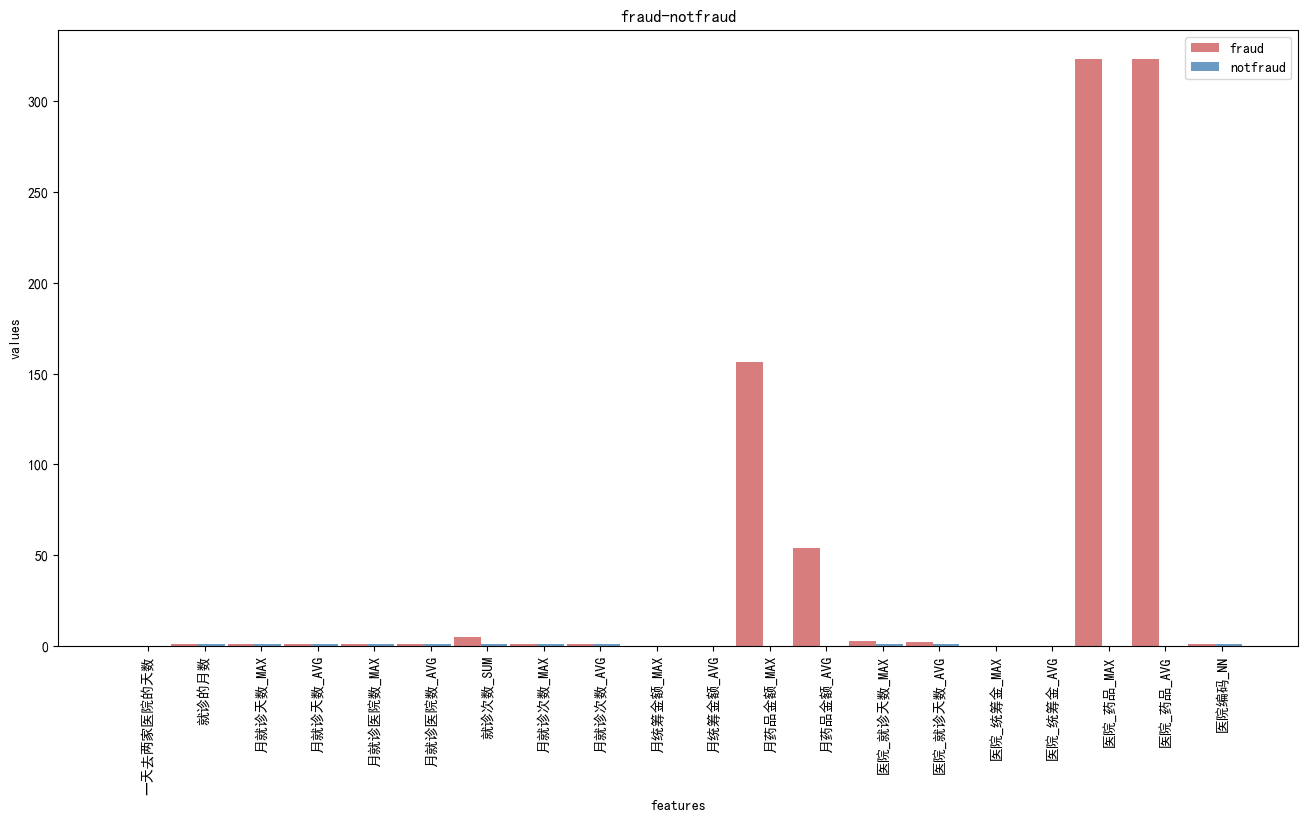

In [30]:
plot_max_min_mean(20,min_fraud_value[0:20],min_notfraud_value[0:20],columns_names_categories[0:20])

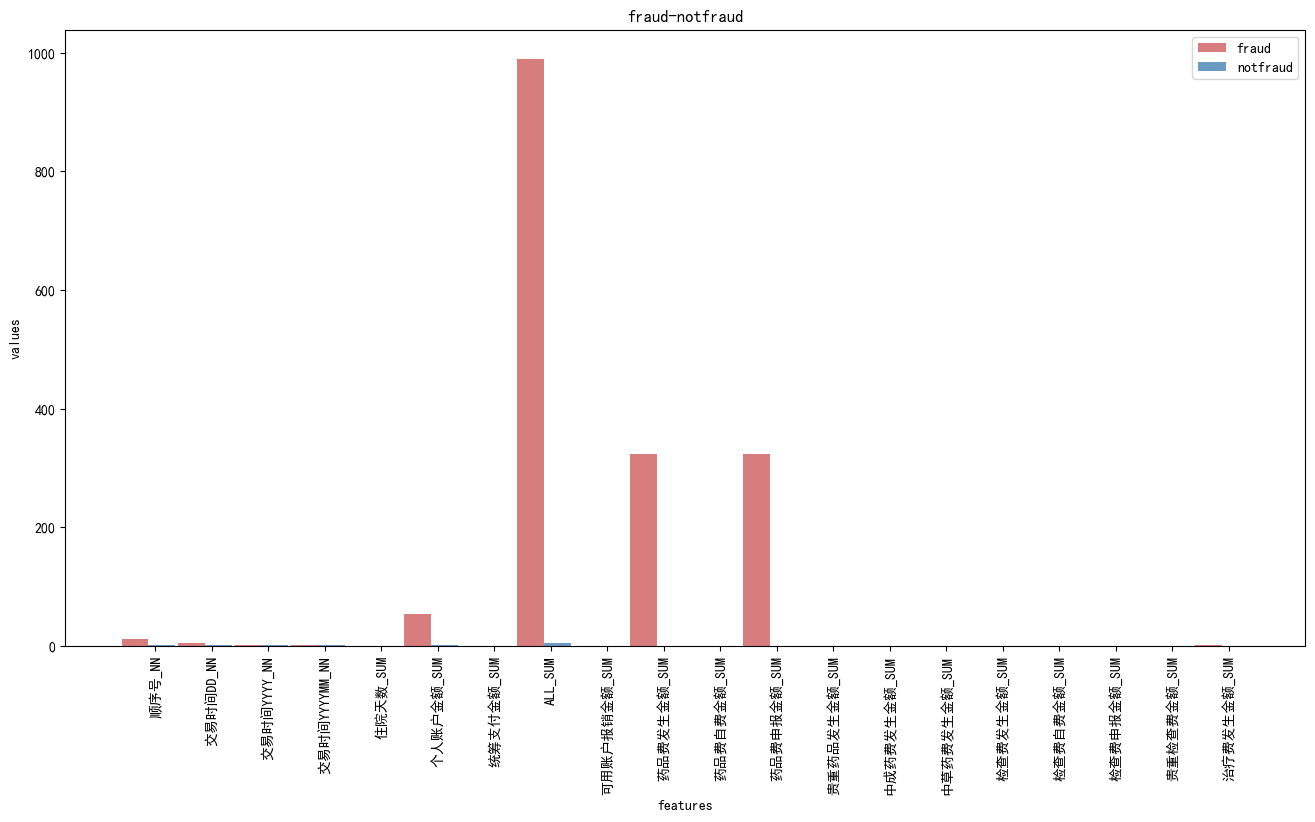

In [31]:
plot_max_min_mean(20,min_fraud_value[20:40],min_notfraud_value[20:40],columns_names_categories[20:40])

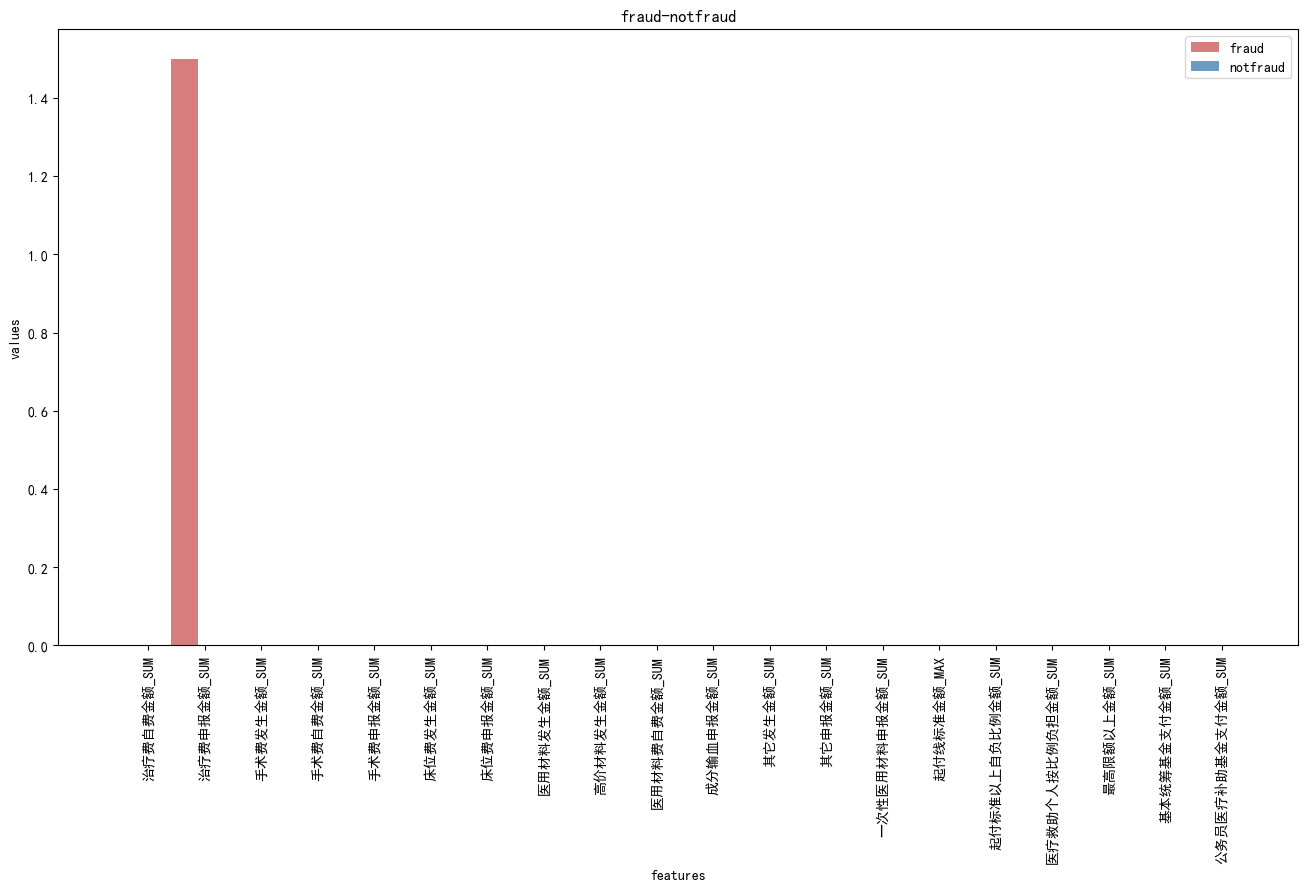

In [32]:
plot_max_min_mean(20,min_fraud_value[40:60],min_notfraud_value[40:60],columns_names_categories[40:60])

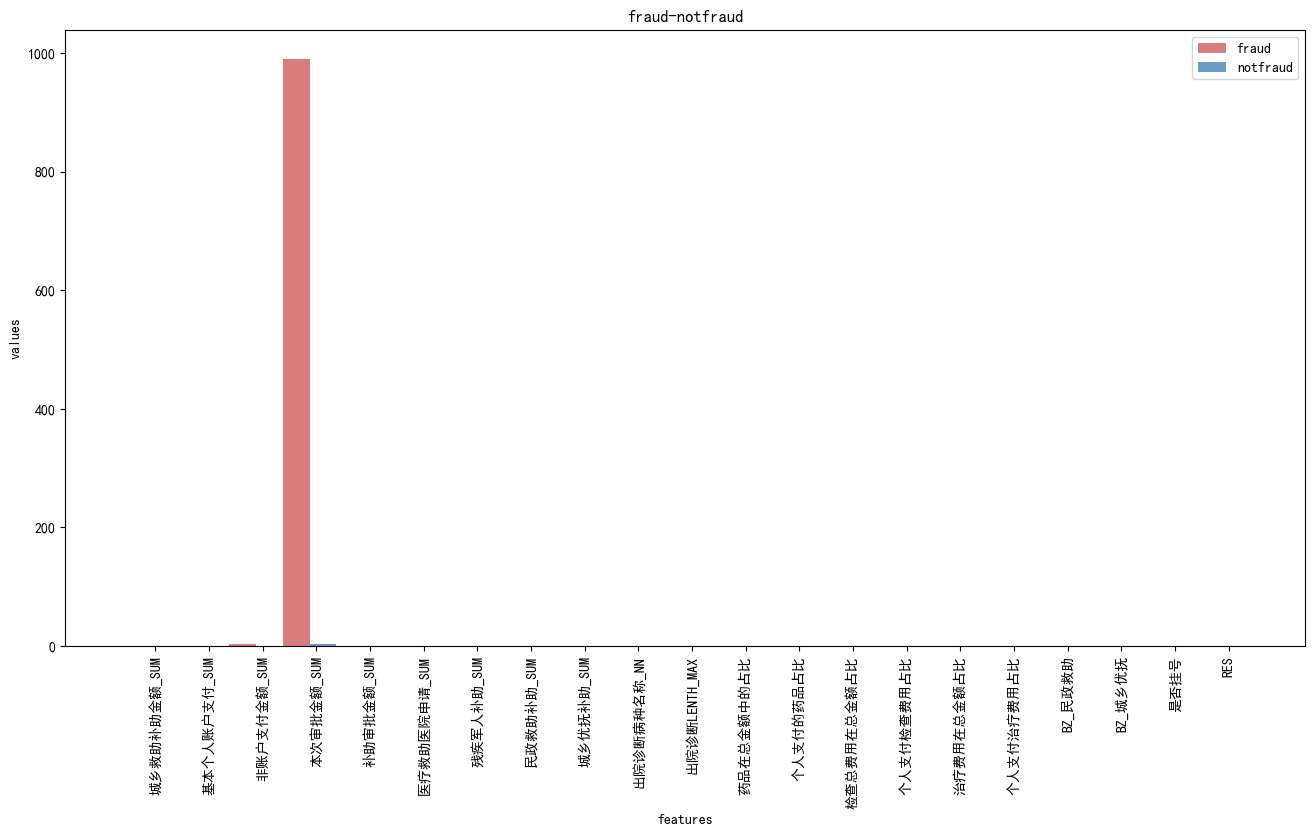

In [33]:
plot_max_min_mean(21,min_fraud_value[60:],min_notfraud_value[60:],columns_names_categories[60:])

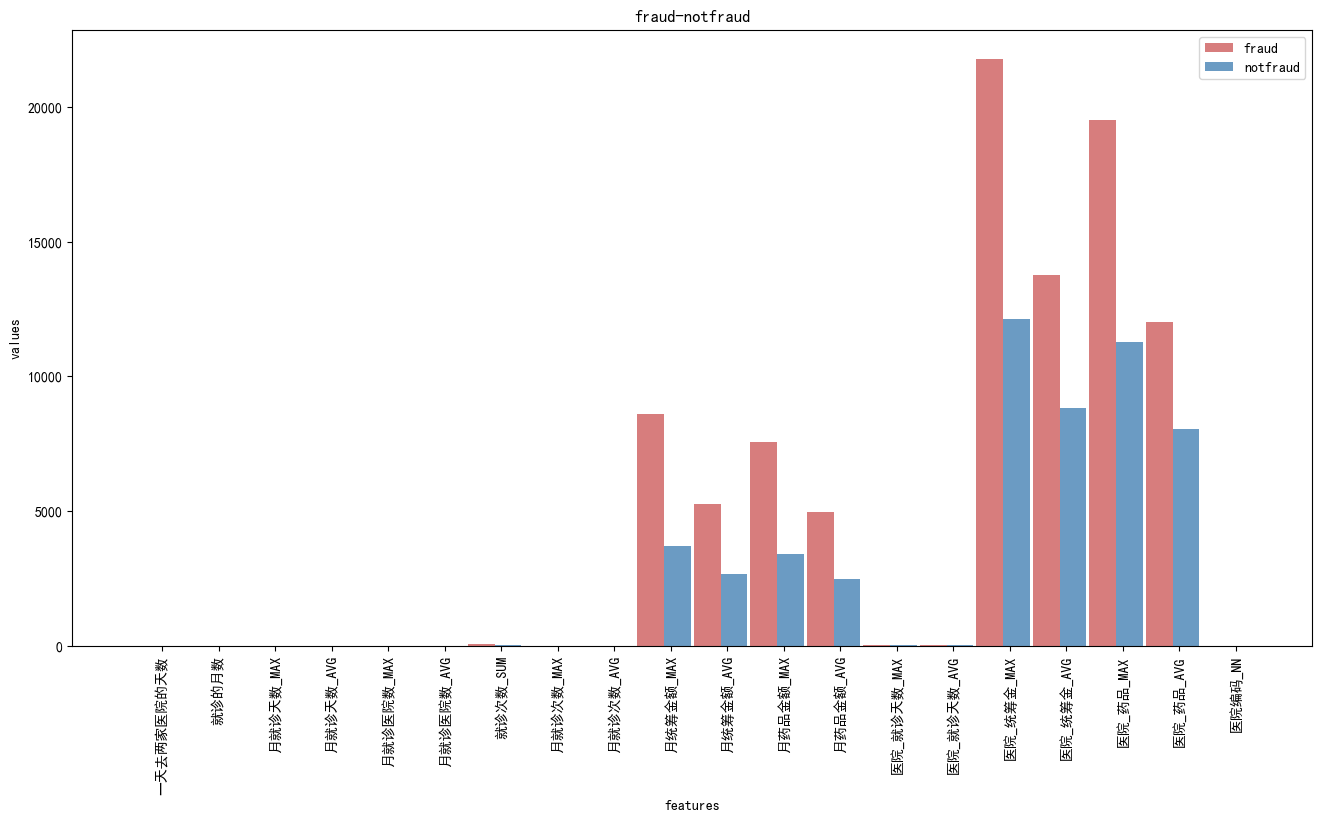

In [34]:
plot_max_min_mean(20,mean_fraud_value[0:20],mean_notfraud_value[0:20],columns_names_categories[0:20])

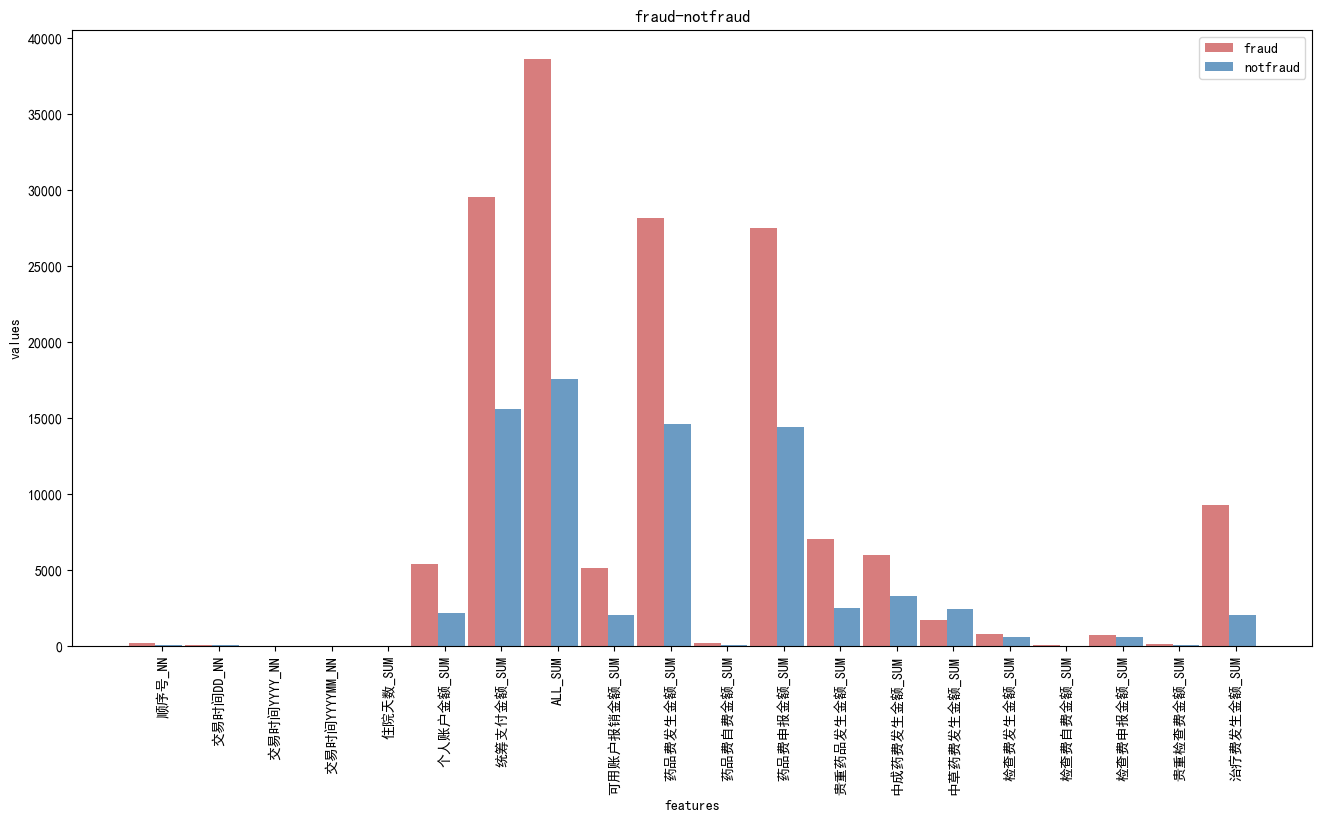

In [35]:
plot_max_min_mean(20,mean_fraud_value[20:40],mean_notfraud_value[20:40],columns_names_categories[20:40])

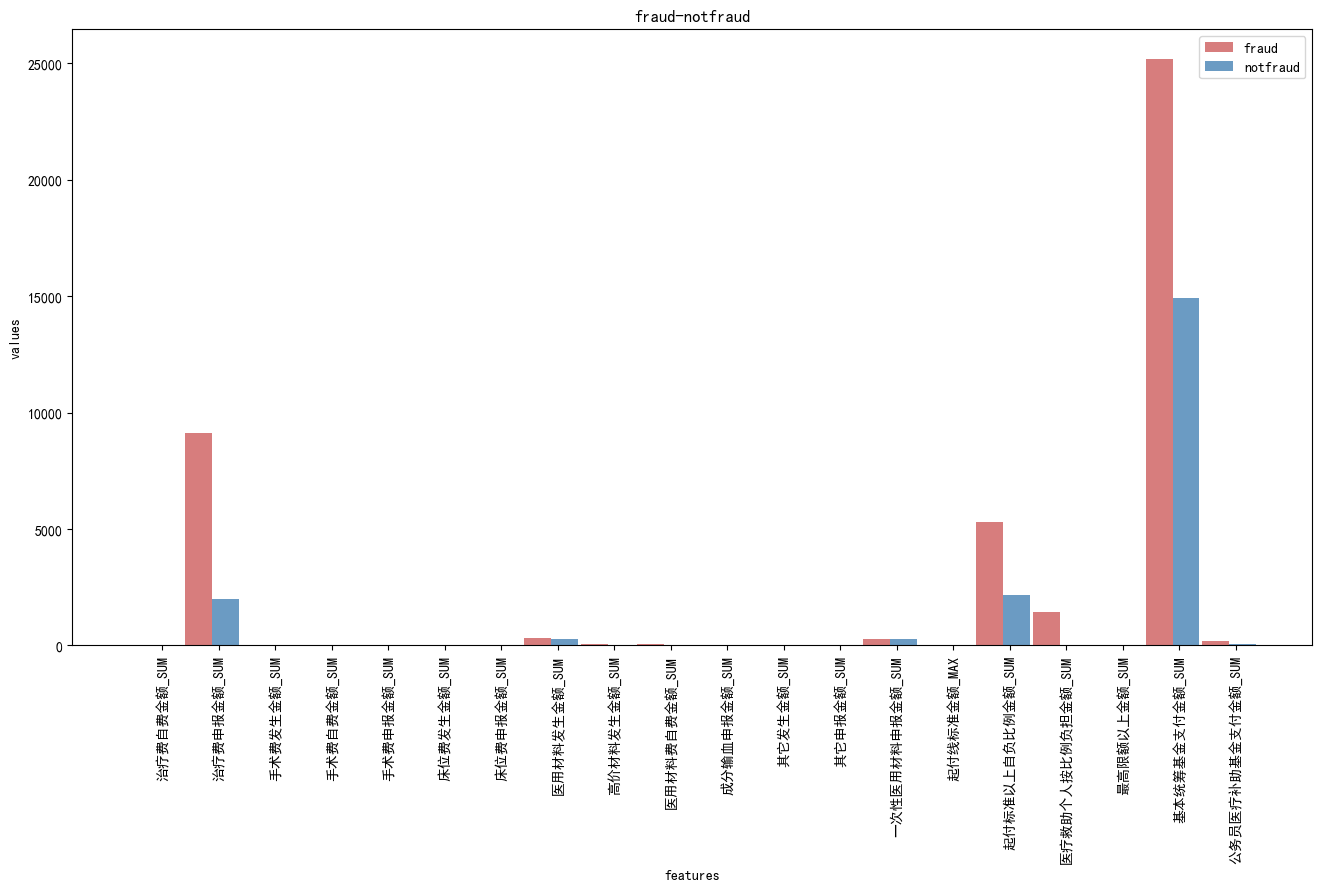

In [36]:
plot_max_min_mean(20,mean_fraud_value[40:60],mean_notfraud_value[40:60],columns_names_categories[40:60])

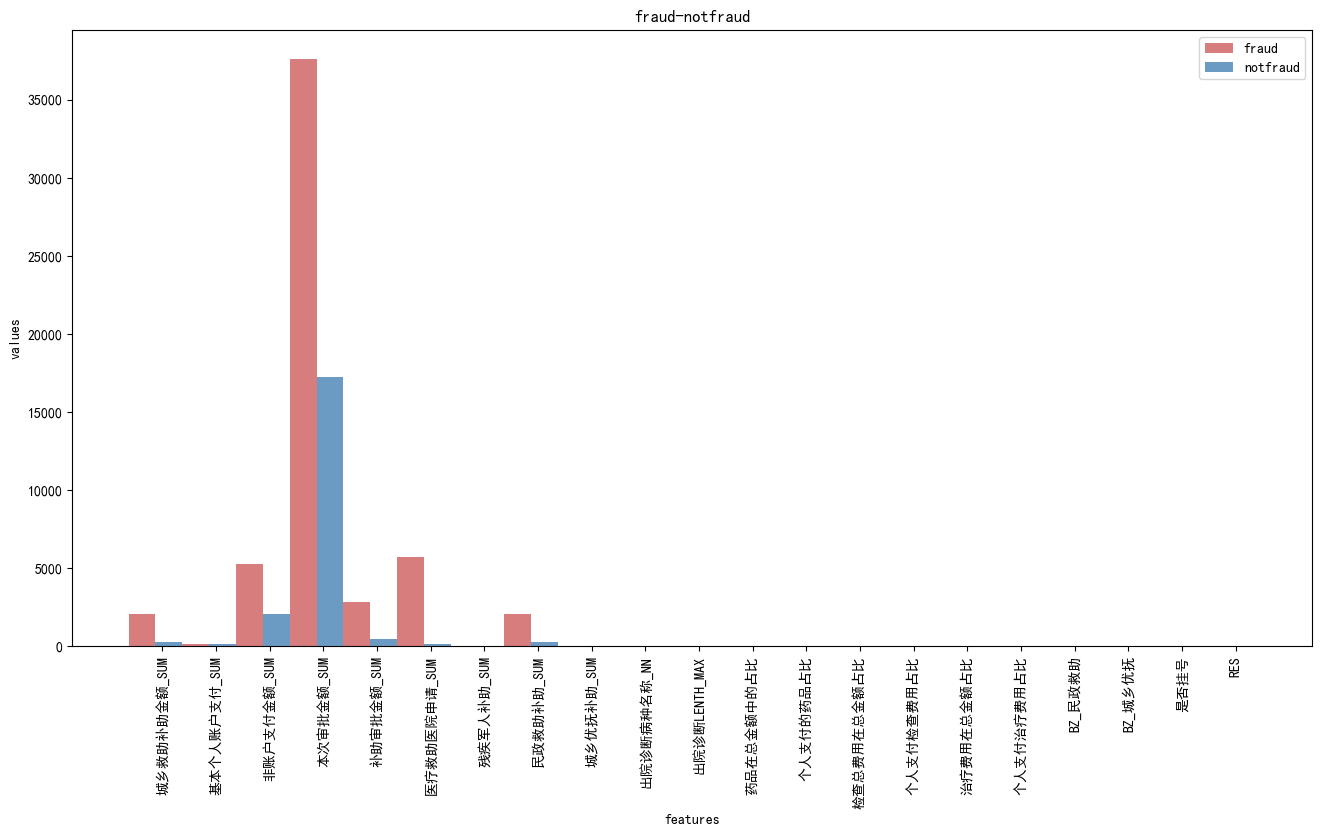

In [40]:
plot_max_min_mean(21,mean_fraud_value[60:],mean_notfraud_value[60:],columns_names_categories[60:])